In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Wahid-vinchenzo/Research-Farm/refs/heads/main/AGrimid/Data%20set%20Agrimid/dummy_ai_preference_dataset.csv')

In [3]:
df

,participant_id,age,gender,role,familiarity_ai,general_trust_ai,comfort_scheduling,comfort_grading_mcq,comfort_grading_essay,risk_scheduling,risk_grading_mcq,need_human_essay,task_pref_sensitive,task_routine_automate,concerns_top3
0,P01,21,Male,Student,3,3,4,3,2,2,3,5,Hiring decisions,Email sorting; Scheduling meetings,Accuracy; Bias; Privacy
1,P02,22,Female,Student,4,4,5,4,3,1,2,4,Financial approval,Note summarizing; MCQ grading,Privacy; Over-automation; Job loss
2,P03,23,Male,Teacher,2,2,3,2,1,3,4,5,Student final grading,Draft generation; Scheduling,Bias; Accountability; Accuracy
3,P04,24,Female,Student,3,3,4,3,2,2,3,5,Medical suggestions,Summaries; Routine research tasks,Misinterpretation; Privacy; Safety
4,P05,25,Male,Office Staff,5,4,5,4,3,1,2,4,Salary calculation,Inventory checks; Emails,Data misuse; Reliability; Accuracy
5,P06,26,Female,Teacher,4,3,4,3,2,2,3,5,Student emotional feedback,Lecture transcription; Scheduling,Bias; Emotional understanding; Fairness
6,P07,27,Male,Student,2,2,3,2,1,3,4,5,Creative writing grading,Grammar correction; MCQ grading,Bias; Misgrading; Context loss
7,P08,28,Male,Office Staff,3,3,4,3,2,2,3,4,Legal decisions,Report formatting; Email sorting,Accountability; Errors; Privacy
8,P09,29,Female,Teacher,4,4,5,4,3,1,2,5,Performance evaluation,Data entry; Scheduling,Accuracy; Transparency; Bias
9,P10,30,Female,Student,5,5,5,5,4,1,1,3,Final academic evaluation,Research summarization; Email filtering,Fairness; Context; Reliability


In [4]:
# Basic dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   participant_id         10 non-null     object
 1   age                    10 non-null     int64 
 2   gender                 10 non-null     object
 3   role                   10 non-null     object
 4   familiarity_ai         10 non-null     int64 
 5   general_trust_ai       10 non-null     int64 
 6   comfort_scheduling     10 non-null     int64 
 7   comfort_grading_mcq    10 non-null     int64 
 8   comfort_grading_essay  10 non-null     int64 
 9   risk_scheduling        10 non-null     int64 
 10  risk_grading_mcq       10 non-null     int64 
 11  need_human_essay       10 non-null     int64 
 12  task_pref_sensitive    10 non-null     object
 13  task_routine_automate  10 non-null     object
 14  concerns_top3          10 non-null     object
dtypes: int64(9), object(6)
mem

In [5]:
# Descriptive statistics
df.describe()

,age,familiarity_ai,general_trust_ai,comfort_scheduling,comfort_grading_mcq,comfort_grading_essay,risk_scheduling,risk_grading_mcq,need_human_essay
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,25.50000,3.500000,3.300000,4.200000,3.300000,2.300000,1.800000,2.700000,4.500000
std,3.02765,1.080123,0.948683,0.788811,0.948683,0.948683,0.788811,0.948683,0.707107
min,21.00000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000
25%,23.25000,3.000000,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000,4.000000
50%,25.50000,3.500000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,5.000000
75%,27.75000,4.000000,4.000000,5.000000,4.000000,3.000000,2.000000,3.000000,5.000000
max,30.00000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000,5.000000


In [6]:
numeric_cols = [
    "age", "familiarity_ai", "general_trust_ai",
    "comfort_scheduling", "comfort_grading_mcq", "comfort_grading_essay",
    "risk_scheduling", "risk_grading_mcq", "need_human_essay"
]


In [7]:
grouped = df.groupby("role")[numeric_cols].mean().round(2)
grouped


,age,familiarity_ai,general_trust_ai,comfort_scheduling,comfort_grading_mcq,comfort_grading_essay,risk_scheduling,risk_grading_mcq,need_human_essay
role,,,,,,,,,
Office Staff,26.5,4.00,3.5,4.5,3.5,2.5,1.5,2.5,4.0
Student,24.8,3.40,3.4,4.2,3.4,2.4,1.8,2.6,4.4
Teacher,26.0,3.33,3.0,4.0,3.0,2.0,2.0,3.0,5.0


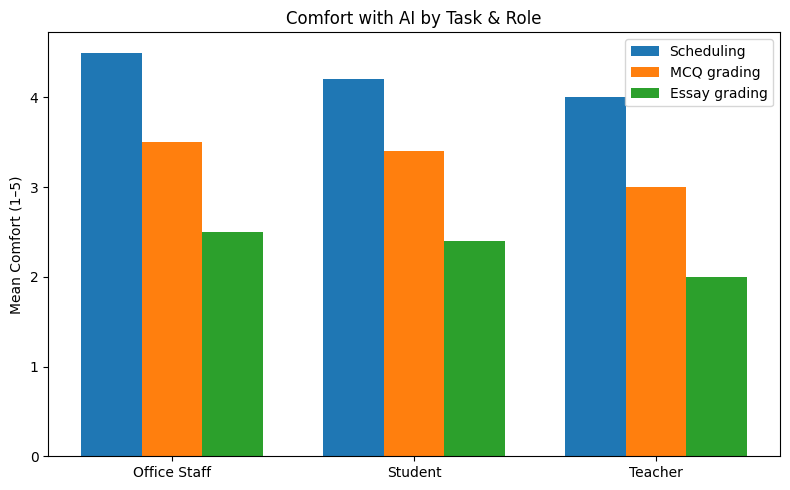

In [8]:
roles = grouped.index.tolist()
x = np.arange(len(roles))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x - width, grouped["comfort_scheduling"], width, label="Scheduling")
ax.bar(x, grouped["comfort_grading_mcq"], width, label="MCQ grading")
ax.bar(x + width, grouped["comfort_grading_essay"], width, label="Essay grading")

ax.set_xticks(x)
ax.set_xticklabels(roles)
ax.set_ylabel("Mean Comfort (1–5)")
ax.set_title("Comfort with AI by Task & Role")
ax.legend()

plt.tight_layout()
plt.show()


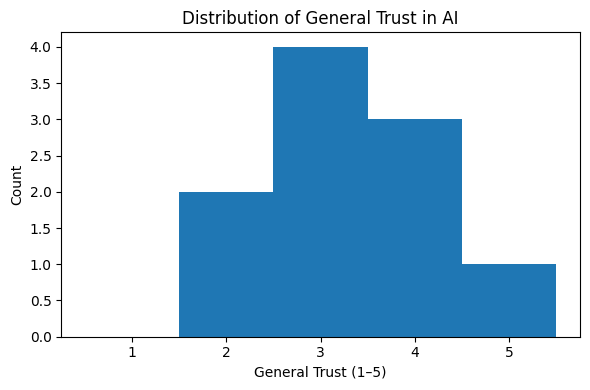

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df["general_trust_ai"], bins=np.arange(1,7)-0.5)
plt.xticks([1,2,3,4,5])
plt.xlabel("General Trust (1–5)")
plt.ylabel("Count")
plt.title("Distribution of General Trust in AI")
plt.tight_layout()
plt.show()


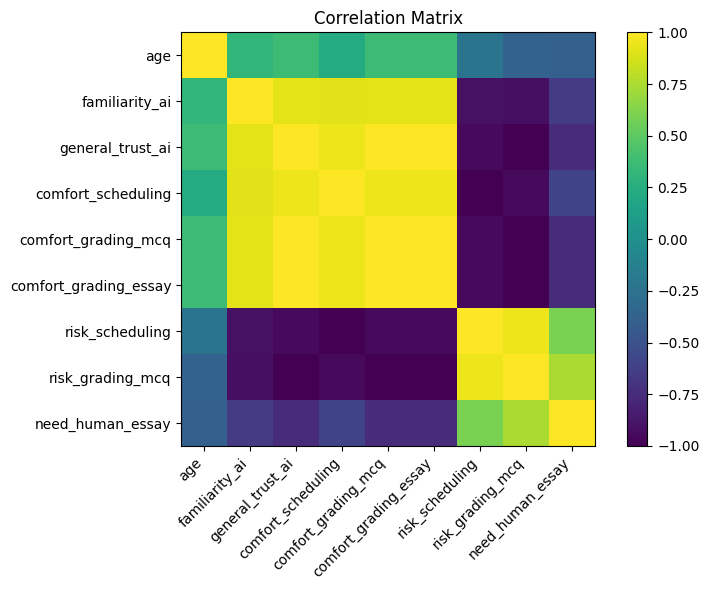

In [10]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [11]:
def split_and_count(series, sep=";"):
    exploded = series.dropna().astype(str).str.split(sep).explode().str.strip().str.lower()
    return exploded.value_counts()


In [12]:
concerns = split_and_count(df["concerns_top3"])
concerns.head(10)


,count
concerns_top3,
bias,5
accuracy,4
privacy,4
accountability,2
reliability,2
fairness,2
misinterpretation,1
job loss,1
over-automation,1


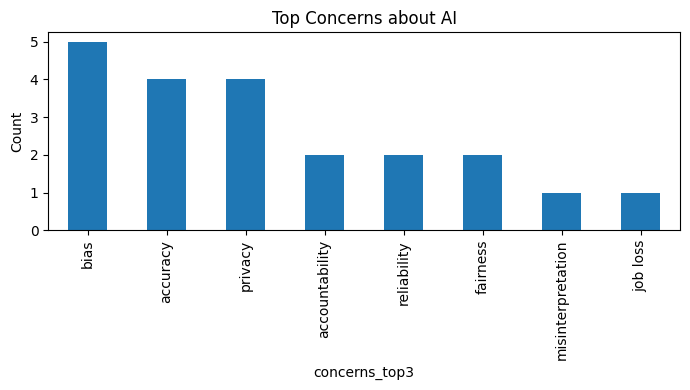

In [13]:
concerns.head(8).plot(kind="bar", figsize=(7,4))
plt.ylabel("Count")
plt.title("Top Concerns about AI")
plt.tight_layout()
plt.show()


In [14]:
routine = split_and_count(df["task_routine_automate"])
routine.head(10)


,count
task_routine_automate,
scheduling,3
email sorting,2
mcq grading,2
scheduling meetings,1
note summarizing,1
draft generation,1
summaries,1
routine research tasks,1
inventory checks,1


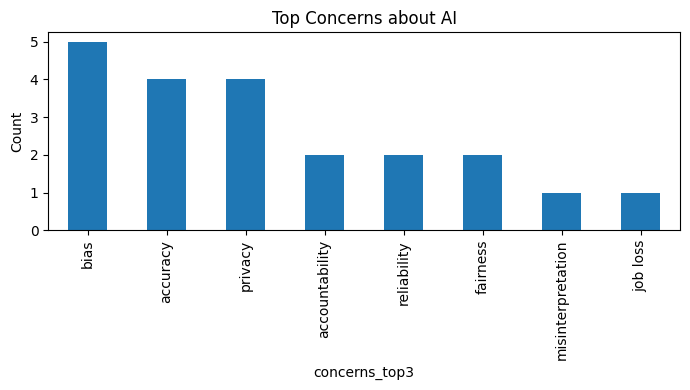

In [15]:
concerns.head(8).plot(kind="bar", figsize=(7,4))
plt.ylabel("Count")
plt.title("Top Concerns about AI")
plt.tight_layout()
plt.show()


In [16]:
routine = split_and_count(df["task_routine_automate"])
routine.head(10)


,count
task_routine_automate,
scheduling,3
email sorting,2
mcq grading,2
scheduling meetings,1
note summarizing,1
draft generation,1
summaries,1
routine research tasks,1
inventory checks,1


In [17]:
sensitive = split_and_count(df["task_pref_sensitive"])
sensitive.head(10)


,count
task_pref_sensitive,
hiring decisions,1
financial approval,1
student final grading,1
medical suggestions,1
salary calculation,1
student emotional feedback,1
creative writing grading,1
legal decisions,1
performance evaluation,1


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

#df = pd.read_csv("/mnt/data/dummy_ai_preference_dataset.csv")

# combine text fields for NLP
texts = df["task_routine_automate"].astype(str) + " " + df["task_pref_sensitive"].astype(str) + " " + df["concerns_top3"].astype(str)

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)
top_terms = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:15]

top_terms


[('bias', np.float64(1.118302989900171)),
 ('accuracy', np.float64(1.062133939078027)),
 ('grading', np.float64(1.0377951798940885)),
 ('scheduling', np.float64(1.0333016764168423)),
 ('privacy', np.float64(0.9841506314028661)),
 ('email', np.float64(0.8553049398877526)),
 ('decisions', np.float64(0.6749649231425865)),
 ('sorting', np.float64(0.6749649231425865)),
 ('accountability', np.float64(0.6662883596897077)),
 ('data', np.float64(0.6597137070827355)),
 ('evaluation', np.float64(0.6595883449966156)),
 ('final', np.float64(0.651215555028726)),
 ('emotional', np.float64(0.6251478375522658)),
 ('student', np.float64(0.6142734798921139)),
 ('reliability', np.float64(0.6054422877717784))]